In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
wine=pd.read_csv(r'C:\Users\mayur/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000,...,6.6000,6.30000,5.40000,6.30000,6.80000,6.2000,5.90000,6.30000,5.90000,6.00000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000,...,0.7250,0.55000,0.74000,0.51000,0.62000,0.6000,0.55000,0.51000,0.64500,0.31000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600,...,0.2000,0.15000,0.09000,0.13000,0.08000,0.0800,0.10000,0.13000,0.12000,0.47000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000,...,7.8000,1.80000,1.70000,2.30000,1.90000,2.0000,2.20000,2.30000,2.00000,3.60000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710,...,0.0730,0.07700,0.08900,0.07600,0.06800,0.0900,0.06200,0.07600,0.07500,0.06700
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000,...,29.0000,26.00000,16.00000,29.00000,28.00000,32.0000,39.00000,29.00000,32.00000,18.00000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000,...,79.0000,35.00000,26.00000,40.00000,38.00000,44.0000,51.00000,40.00000,44.00000,42.00000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978,...,0.9977,0.99314,0.99402,0.99574,0.99651,0.9949,0.99512,0.99574,0.99547,0.99549
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500,...,3.2900,3.32000,3.67000,3.42000,3.42000,3.4500,3.52000,3.42000,3.57000,3.39000
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000,...,0.5400,0.82000,0.56000,0.75000,0.82000,0.5800,0.76000,0.75000,0.71000,0.66000


In [6]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

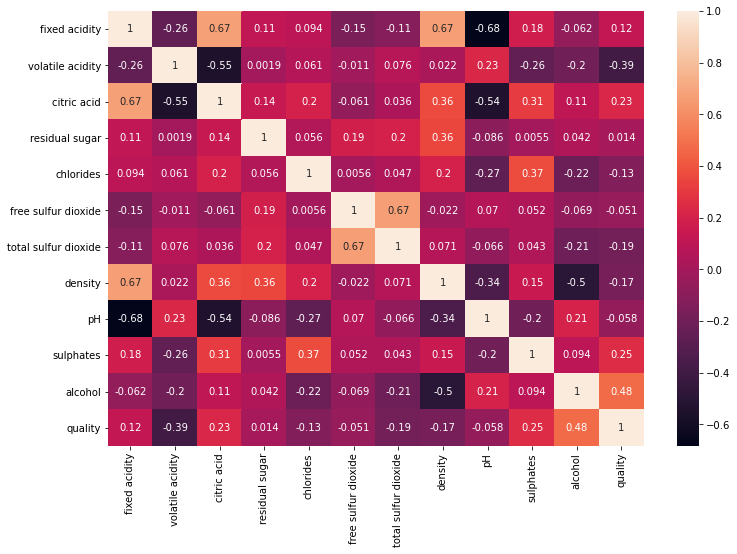

In [7]:
plt.figure(figsize = (12,8))
sns.heatmap(wine.corr(),annot = True)


C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


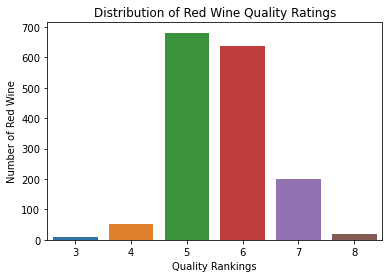

In [8]:
sns.barplot(wine['quality'].unique(),wine['quality'].value_counts())
plt.xlabel("Quality Rankings")
plt.ylabel("Number of Red Wine")
plt.title("Distribution of Red Wine Quality Ratings")
plt.show()

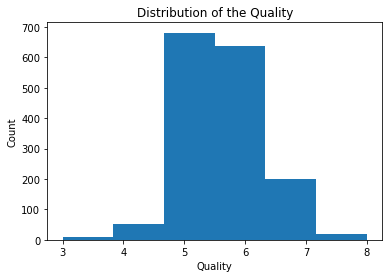

In [9]:
plt.hist(wine.quality,bins=6,histtype='bar')

plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

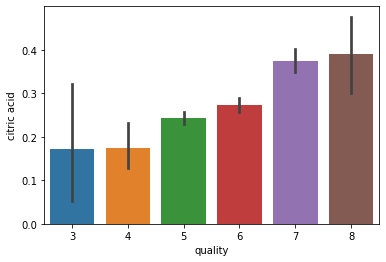

In [10]:

sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

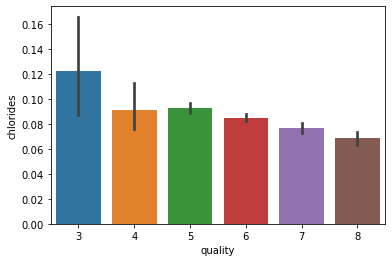

In [11]:

sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

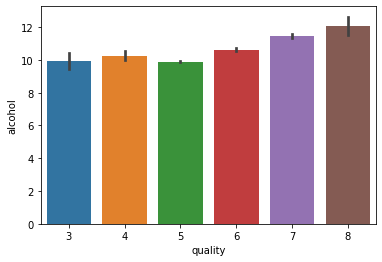

In [12]:

sns.barplot(x = 'quality', y = 'alcohol', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

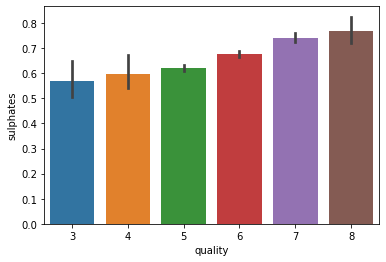

In [13]:
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

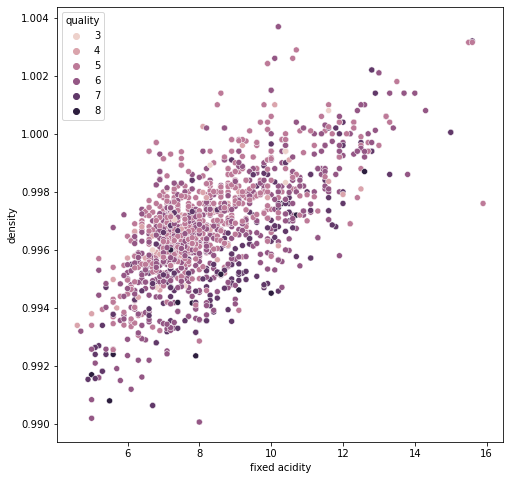

In [14]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'quality' ,data = wine)

In [15]:
wine['quality'] = wine.quality.apply(lambda x : 1 if x > 6.5 else 0)


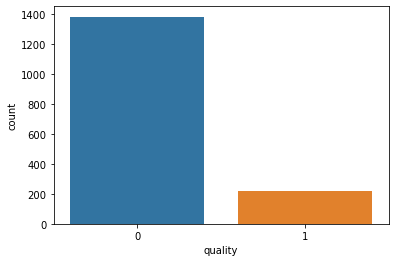

In [16]:
sns.countplot(data = wine, x = 'quality')
plt.show()

In [17]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4 )
display(X_train.head(),y_train.head(),'Testing Data',X_test.head(),y_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
998,8.9,0.840,0.34,1.40,0.050,4.0,10.0,0.99554,3.12,0.48,9.1
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
731,8.9,0.875,0.13,3.45,0.088,4.0,14.0,0.99940,3.44,0.52,11.5
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
675,9.3,0.410,0.39,2.20,0.064,12.0,31.0,0.99840,3.26,0.65,10.2


998     0
575     0
731     0
1299    0
675     0
Name: quality, dtype: int64

'Testing Data'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
289,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2
962,6.6,0.57,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5
826,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
57,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4


289    0
962    0
826    1
495    1
57     0
Name: quality, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

In [29]:
wine_base=DecisionTreeClassifier(max_depth=10,random_state=4)
wine_base.fit(X_train,y_train)
AdaBoost= AdaBoostClassifier(base_estimator=wine_base,n_estimators=300,learning_rate=1)

In [31]:
y_pred=wine_base.predict(X_test)
boost_model=AdaBoost.fit(X_train,y_train)

In [34]:
y_pred1=boost_model.predict(X_test)
pred1=metrics.accuracy_score(y_test,y_pred1)
print("accuracy with Ada Boost",pred1*100)

accuracy with Ada Boost 91.04166666666667


In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[391  27]
 [ 28  34]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       418
           1       0.56      0.55      0.55        62

    accuracy                           0.89       480
   macro avg       0.75      0.74      0.74       480
weighted avg       0.88      0.89      0.89       480

0.8854166666666666


In [23]:
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.8854166666666666


In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1 = clf.predict(x_test)
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred1))

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.85625
